## 1. Netflix Data Analysis
<p><img src="images/netflix_logo.png" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>
<p>Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Loading the data from a CSV

<p>What does the trend for duration of netflix videos look like over a longer period of time?</p>

<p>We have access to the CSV file, available at the path <code>"datasets/netflix_data.csv"</code>. We create a DataFrame. Given the length of data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.</p>

In [2]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## 3. Filtering for movies
<p>We have our data. We will start looking at movie lengths. </p>

<p>Looking at the first five rows of our new DataFrame, we notice a column <code>type</code>. Scanning the column, it's clear there are also TV shows in the dataset. Moreover, the <code>duration</code> seems to represent different values depending on whether the row is a movie or a show (the number of minutes versus the number of seasons)?</p>

<p>A DataFrame allows us to filter data quickly, and we can select rows where <code>type</code> is <code>Movie</code>. We don't need information from all of the columns, so we create a new DataFrame <code>netflix_movies</code> containing only <code>title</code>, <code>country</code>, <code>genre</code>, <code>release_year</code>, and <code>duration</code>.</p>

In [3]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df["type"] == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title", "country", "genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## 4. Creating a scatter plot
<p>ONow we visualize the data to inspect the data over a longer range of time.</p>
<p>This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so we use a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.</p>

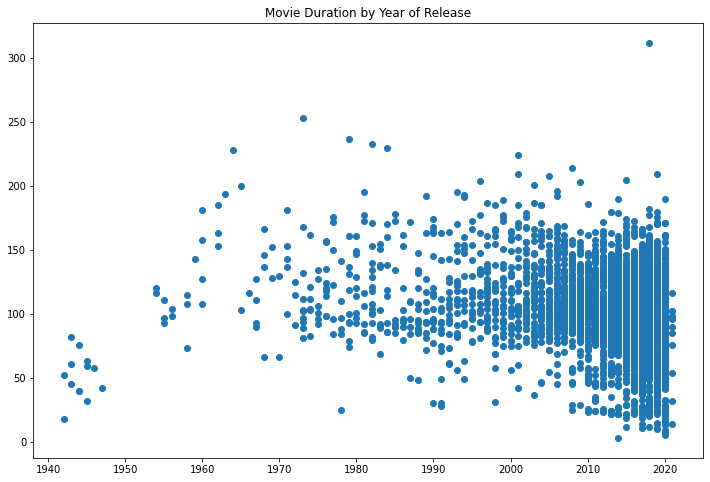

In [4]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

## 5. Marking non-feature films
<p>It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster. </p>
<p>We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.</p>
<p>In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!</p>

In [5]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

# Print the first 20 rows of short_movies
short_movies.head(20)

# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for label, row in netflix_movies_col_subset.iterrows() :
    if row["genre"] == "Children" :
        colors.append("red")
    elif row["genre"] == "Documentaries" :
        colors.append("blue")
    elif row["genre"] == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")

## 6. Plotting with color!
<p>We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.</p>

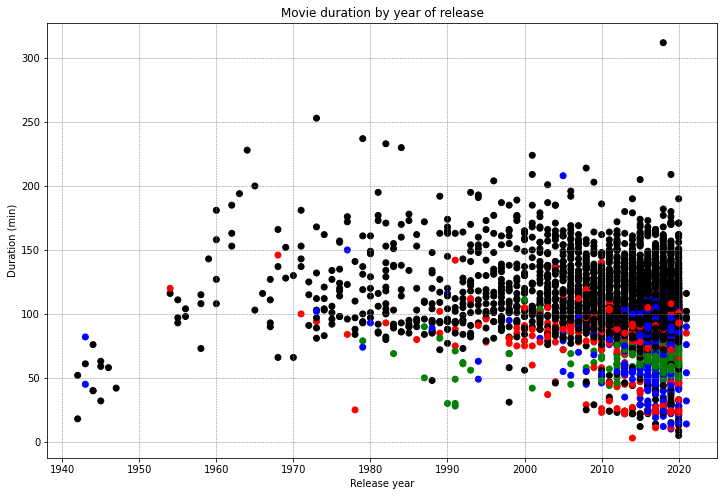

In [6]:
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Show the plot
plt.show()